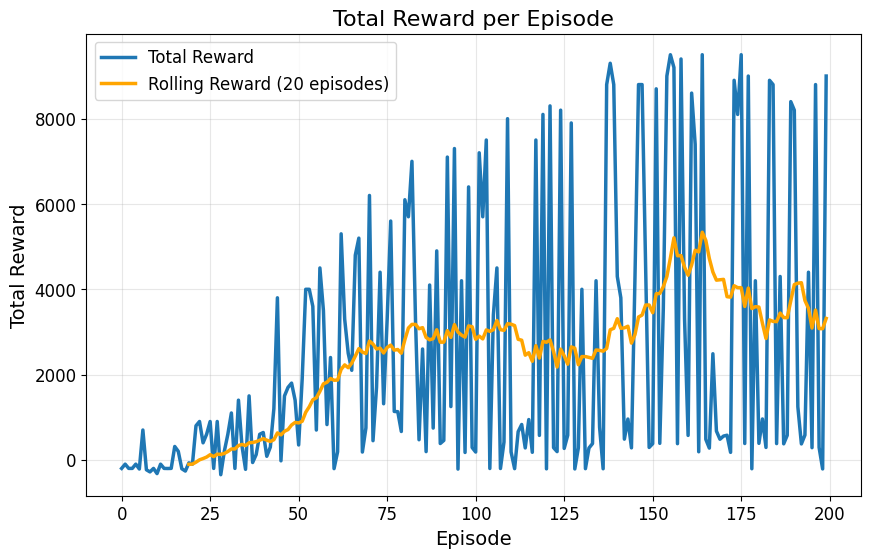

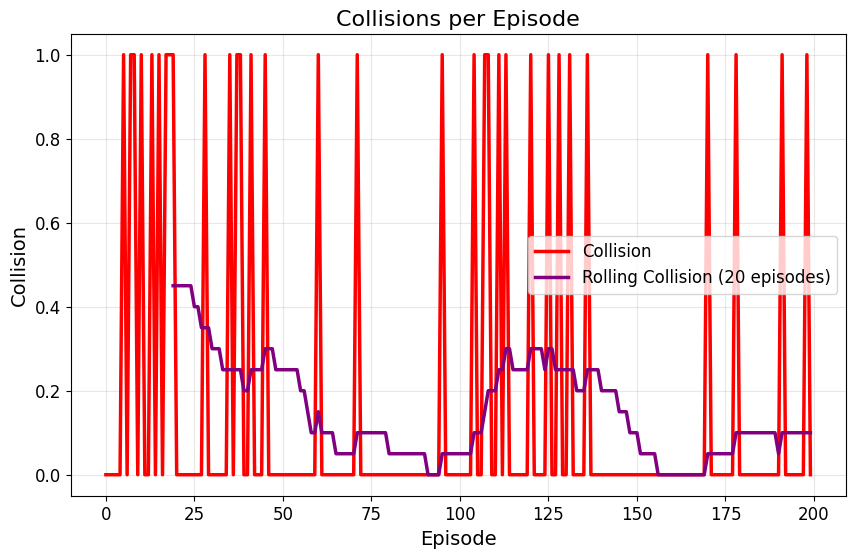

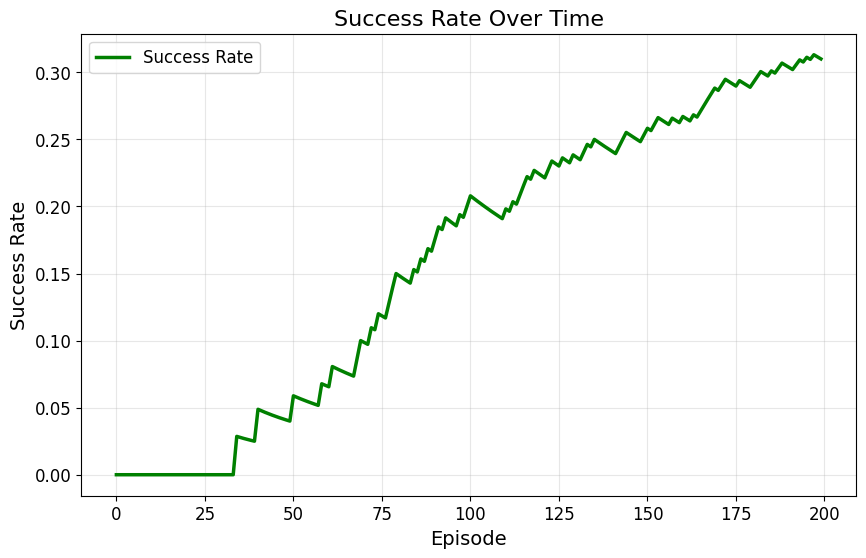

Summary Statistics:
       total_reward   collision     success
count    200.000000  200.000000  200.000000
mean    2517.760000    0.160000    0.310000
std     3148.750727    0.367526    0.463654
min     -348.000000    0.000000    0.000000
25%      274.000000    0.000000    0.000000
50%      748.000000    0.000000    0.000000
75%     4300.000000    0.000000    1.000000
max     9500.000000    1.000000    1.000000

Final Success Rate: 31.00%
Total Collisions: 32


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

experiment_folder = "training_logs/lr_0.001_g_0.95_seed_42"
results_file = os.path.join(experiment_folder, "training_results.csv")
results_df = pd.read_csv(results_file)

# Display the first few rows
results_df.head()

# Plot total reward per episode
plt.figure(figsize=(10, 6))
plt.plot(results_df['episode'], results_df['total_reward'], label='Total Reward')
plt.plot(results_df['episode'], results_df['rolling_reward'], label='Rolling Reward (20 episodes)', color='orange')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.legend()
plt.grid()
plt.show()

# Plot collisions per episode
plt.figure(figsize=(10, 6))
plt.plot(results_df['episode'], results_df['collision'], label='Collision', color='red')
plt.plot(results_df['episode'], results_df['rolling_collision'], label='Rolling Collision (20 episodes)', color='purple')
plt.xlabel('Episode')
plt.ylabel('Collision')
plt.title('Collisions per Episode')
plt.legend()
plt.grid()
plt.show()

# Calculate and plot success rate over time
results_df['cumulative_success'] = results_df['success'].cumsum()
results_df['success_rate'] = results_df['cumulative_success'] / (results_df['episode'] + 1)

plt.figure(figsize=(10, 6))
plt.plot(results_df['episode'], results_df['success_rate'], label='Success Rate', color='green')
plt.xlabel('Episode')
plt.ylabel('Success Rate')
plt.title('Success Rate Over Time')
plt.legend()
plt.grid()
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(results_df[['total_reward', 'collision', 'success']].describe())

# Final success rate and total collisions
final_success_rate = results_df['success'].mean() * 100
total_collisions = results_df['collision'].sum()
print(f"\nFinal Success Rate: {final_success_rate:.2f}%")
print(f"Total Collisions: {total_collisions}")